In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import re
import seaborn as sns
import collections
import community
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import wordnet as wn

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
edges_raw = pd.read_csv("no_stopwords.csv")

# Convert columns into list of tuples
tup_edges = list(zip(edges_raw["Source"], edges_raw["Target"]))

# # list of nodes and associated connections
edges = [t for t in (set(tuple(i) for i in tup_edges))]

In [4]:
# create networkx graph
Gx = nx.Graph()
Gx.add_edges_from(edges)

In [5]:
degrees = pd.DataFrame([[tup[0], tup[1]]for tup in nx.degree(Gx)])

degrees.rename(mapper={0:"Node ID",1:"Degrees"},inplace=True,axis=1)
degrees.sort_values("Degrees",inplace=True)
degrees.reset_index(inplace=True,drop=True)
degrees.head()

,Node ID,Degrees
0,ape-man,1
1,single dwelling,1
2,blister pack,1
3,bubble pack,1
4,pimenta officinalis,1


[Text(0, 0.5, 'Percentage of Nodes'),
 Text(0.5, 0, 'Degrees'),
 Text(0.5, 1.0, 'Degree Distribution')]

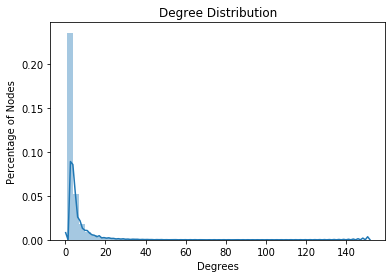

In [6]:
dist = sns.distplot(degrees["Degrees"])
dist.set(xlabel='Degrees', ylabel='Percentage of Nodes',title="Degree Distribution")

In [6]:
eig = nx.eigenvector_centrality(Gx)
degree = nx.degree_centrality(Gx)
between = nx.betweenness_centrality(Gx)

eig_df = pd.DataFrame.from_dict(eig, orient="index", columns = ["Eig Centrality"])
degree_df = pd.DataFrame.from_dict(degree, orient="index", columns = ["Degree Centrality"])
# takes so long to run so just going to comment this out. CSV file of it already exists
# between_df = pd.DataFrame.from_dict(between, orient="index", columns = ["Between Centrality"])

In [9]:
between_df.to_csv("betweeness.csv")

In [10]:
partition = community.best_partition(Gx,resolution=5)

In [11]:
communities = pd.DataFrame(Counter(partition.values()),index=[0])
trans = communities.T
trans.rename(mapper={0:"Count"},axis=1,inplace=True)

In [15]:
partition

{'frosty': 0,
 'snappy': 0,
 'great burdock': 1,
 'arctium lappa': 1,
 'foul': 2,
 'congested': 0,
 'troop': 3,
 'troops': 3,
 'severalize': 0,
 'tell apart': 0,
 'pea green': 4,
 'yellowish green': 4,
 'cracked': 2,
 'loony': 2,
 'understanding': 0,
 'discernment': 0,
 'sweet-scented geranium': 6,
 'pelargonium graveolens': 6,
 'den': 0,
 'hideout': 0,
 'climb': 0,
 'risen': 0,
 'dry gangrene': 7,
 'mumification necrosis': 7,
 'up to her neck': 8,
 'up to his neck': 8,
 'take over': 0,
 'assuming': 0,
 'buffalo gourd': 9,
 'wild pumpkin': 9,
 'dine in': 10,
 'eat in': 10,
 'reposeful': 0,
 'restful': 0,
 'argument': 0,
 'logical argument': 0,
 'multicolored': 11,
 'pied': 11,
 'extenuate': 0,
 'mitigate': 0,
 'peg down': 0,
 'specified': 0,
 'hurt': 2,
 'hurting': 2,
 'chew up': 0,
 'berating': 0,
 'dumb': 0,
 'slowest': 0,
 'mellow': 0,
 'molten': 0,
 'flatness': 0,
 'sluggishness': 12,
 'day-and-night': 13,
 'round-the-clock': 13,
 'narcotize': 86,
 'narcotizing': 86,
 'fearfulness'

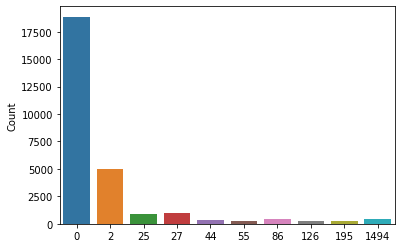

In [12]:
sns.barplot(x=trans.sort_values(by=["Count"],ascending=False).head(10).index,y=trans.sort_values(by=["Count"],ascending=False).head(10)["Count"])

In [118]:
trans["Count"].describe()

count    19504.000000
mean         4.394637
std        134.108848
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max      18227.000000
Name: Count, dtype: float64

In [21]:
test = trans[trans["Count"]==2]
just_2 = list(test.index)
just_2

[10,
 18,
 31,
 32,
 33,
 35,
 37,
 47,
 50,
 53,
 54,
 57,
 68,
 69,
 70,
 72,
 82,
 84,
 87,
 89,
 97,
 106,
 112,
 129,
 133,
 136,
 144,
 151,
 159,
 162,
 164,
 166,
 168,
 175,
 176,
 179,
 180,
 183,
 193,
 197,
 198,
 207,
 225,
 230,
 234,
 247,
 250,
 253,
 255,
 257,
 258,
 262,
 265,
 269,
 271,
 278,
 279,
 286,
 291,
 304,
 308,
 314,
 319,
 321,
 324,
 325,
 327,
 336,
 338,
 342,
 343,
 356,
 362,
 363,
 364,
 367,
 376,
 377,
 379,
 381,
 382,
 385,
 392,
 399,
 409,
 412,
 416,
 425,
 426,
 434,
 435,
 436,
 437,
 439,
 441,
 450,
 457,
 464,
 469,
 470,
 472,
 476,
 477,
 480,
 482,
 487,
 491,
 504,
 506,
 510,
 514,
 515,
 522,
 523,
 524,
 529,
 542,
 543,
 545,
 556,
 557,
 560,
 570,
 575,
 577,
 578,
 582,
 584,
 590,
 591,
 600,
 612,
 620,
 621,
 622,
 623,
 628,
 631,
 634,
 636,
 647,
 649,
 651,
 670,
 692,
 699,
 704,
 710,
 712,
 716,
 717,
 719,
 720,
 726,
 729,
 733,
 734,
 746,
 747,
 752,
 761,
 762,
 764,
 768,
 777,
 786,
 788,
 789,
 795,
 796,
 

In [24]:
look_at_twos = {key:val for key, val in partition.items() if val not in just_2}

look_at_twos

{'frosty': 0,
 'snappy': 0,
 'great burdock': 1,
 'arctium lappa': 1,
 'foul': 2,
 'congested': 0,
 'troop': 3,
 'troops': 3,
 'severalize': 0,
 'tell apart': 0,
 'pea green': 4,
 'yellowish green': 4,
 'cracked': 2,
 'loony': 2,
 'understanding': 0,
 'discernment': 0,
 'sweet-scented geranium': 6,
 'pelargonium graveolens': 6,
 'den': 0,
 'hideout': 0,
 'climb': 0,
 'risen': 0,
 'dry gangrene': 7,
 'mumification necrosis': 7,
 'up to her neck': 8,
 'up to his neck': 8,
 'take over': 0,
 'assuming': 0,
 'buffalo gourd': 9,
 'wild pumpkin': 9,
 'reposeful': 0,
 'restful': 0,
 'argument': 0,
 'logical argument': 0,
 'multicolored': 11,
 'pied': 11,
 'extenuate': 0,
 'mitigate': 0,
 'peg down': 0,
 'specified': 0,
 'hurt': 2,
 'hurting': 2,
 'chew up': 0,
 'berating': 0,
 'dumb': 0,
 'slowest': 0,
 'mellow': 0,
 'molten': 0,
 'flatness': 0,
 'sluggishness': 12,
 'day-and-night': 13,
 'round-the-clock': 13,
 'narcotize': 86,
 'narcotizing': 86,
 'fearfulness': 2,
 'fright': 0,
 'clear up':

In [25]:
look_at_twos.items()

dict_items([('frosty', 0), ('snappy', 0), ('great burdock', 1), ('arctium lappa', 1), ('foul', 2), ('congested', 0), ('troop', 3), ('troops', 3), ('severalize', 0), ('tell apart', 0), ('pea green', 4), ('yellowish green', 4), ('cracked', 2), ('loony', 2), ('understanding', 0), ('discernment', 0), ('sweet-scented geranium', 6), ('pelargonium graveolens', 6), ('den', 0), ('hideout', 0), ('climb', 0), ('risen', 0), ('dry gangrene', 7), ('mumification necrosis', 7), ('up to her neck', 8), ('up to his neck', 8), ('take over', 0), ('assuming', 0), ('buffalo gourd', 9), ('wild pumpkin', 9), ('reposeful', 0), ('restful', 0), ('argument', 0), ('logical argument', 0), ('multicolored', 11), ('pied', 11), ('extenuate', 0), ('mitigate', 0), ('peg down', 0), ('specified', 0), ('hurt', 2), ('hurting', 2), ('chew up', 0), ('berating', 0), ('dumb', 0), ('slowest', 0), ('mellow', 0), ('molten', 0), ('flatness', 0), ('sluggishness', 12), ('day-and-night', 13), ('round-the-clock', 13), ('narcotize', 86), 

In [163]:
Gc = max(nx.connected_component_subgraphs(Gx), key=len)

In [169]:
len(Gc.nodes)

30766

In [5]:
def Draw_ego_network(G, layout, node, dist):
    
    fig, ax = plt.subplots(figsize=(12,8)) #<-- Create the subplots
    
    nx.draw_networkx_nodes(G,layout,node_size=10, alpha=0.3)
    nx.draw_networkx_edges(G,layout, alpha=0.1)
    
    rgb_values = sns.color_palette("husl", dist+1)

    
    my_cmap = ListedColormap(rgb_values.as_hex())

    for comp_node in sorted(G.nodes):

        if node != comp_node and len(nx.shortest_path(G, source= node, target= comp_node)) -1 <= dist:
            
            path = nx.shortest_path(G, source= node, target= comp_node)
            path_edges = list(zip(path,path[1:]))
            
            nx.draw_networkx_nodes(G,layout,nodelist=path,node_color='k',node_size = 20, label=True)  #<-- Plot the nodes
            nx.draw_networkx_edges(G,layout,edgelist=path_edges,edge_color=[rgb_values[len(path)-2] for each in range(len(path_edges))],width=1)
            
#     Following code is used to create and format the colour bar
    sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0, vmax=dist))
    sm.set_array([])
    cbar = fig.colorbar(sm,ticks=np.unique([i for i in range(len(rgb_values))]))
    
    tick_locs = (np.arange(len(rgb_values)) + 0.5)*(len(rgb_values)-1)/len(rgb_values)
    cbar.set_ticks(tick_locs)

    # set tick labels (as before)
    cbar.set_ticklabels(np.arange(len(rgb_values)))
    cbar.set_label('Nodes Interaction Distance', rotation=90)
    
#     enhance size and change colour of source node
    nx.draw_networkx_nodes(G, layout, nodelist=[node], node_color='r',node_size = 200)
    nx.draw_networkx_labels(G,layout)
    

C:\Users\Vass\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Vass\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Vass\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


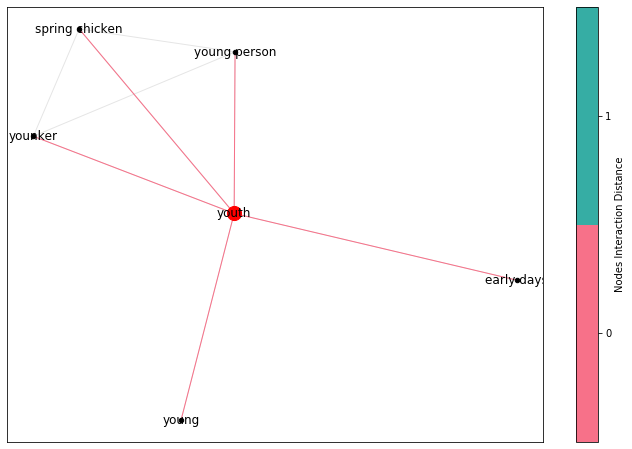

In [6]:
ego_graph = nx.ego_graph(Gx, "youth", radius=1)

pos = nx.spring_layout(ego_graph)
Draw_ego_network(ego_graph, pos, "youth", 1)

In [19]:
# random words pulled out to test in comparing code
# pd.DataFrame([node for node in ego_graph.nodes],columns=["Break"]).to_csv("words_for_break.csv")
# pd.DataFrame([node for node in ego_graph.nodes],columns=["bad"]).to_csv("words_for_bad.csv")
# pd.DataFrame([node for node in ego_graph.nodes],columns=["deal"]).to_csv("words_for_deal.csv")
pd.DataFrame([node for node in ego_graph.nodes],columns=["good"]).to_csv("words_for_good.csv")


In [7]:
nx.eigenvector_centrality(ego_graph)

{'young person': 0.4631952209059741,
 'early days': 0.17164050355253602,
 'spring chicken': 0.4631952209059741,
 'young': 0.17164050355253602,
 'younker': 0.4631952209059741,
 'youth': 0.5453711003253301}